In [1]:
import networkx as nx
import math
import itertools
%pylab inline
from sklearn.metrics import pairwise_distances

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("../CODE") # add code folder

from NNO_util_minh import *

In [3]:
f=open('dolphins.txt','r')
print(f.read())

The file dolphins.gml contains an undirected social network of frequent
associations between 62 dolphins in a community living off Doubtful Sound,
New Zealand, as compiled by Lusseau et al. (2003).  Please cite

  D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and
  S. M. Dawson, The bottlenose dolphin community of Doubtful Sound features
  a large proportion of long-lasting associations, Behavioral Ecology and
  Sociobiology 54, 396-405 (2003).

Additional information on the network can be found in

  D. Lusseau, The emergent properties of a dolphin social network,
  Proc. R. Soc. London B (suppl.) 270, S186-S188 (2003).

  D. Lusseau, Evidence for social role in a dolphin social network,
  Preprint q-bio/0607048 (http://arxiv.org/abs/q-bio.PE/0607048)



In [4]:
f1=open('dolphins.gml','r')
#print(f1.read())

In [5]:
from itertools import count
my_graph = nx.Graph()
gml_graph = nx.read_gml('./dolphins.gml')
pos=nx.spring_layout(gml_graph)
#nx.draw(gml_graph, with_labels=True, font_weight='bold')
#plt.savefig('Dolphins.pdf')
#plt.show()

In [6]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=measures.values(),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


In [7]:
def run_pagerank_save_iterations(x0,T,Al,N):
    x=x0.copy()
    previous_r = x
    X = np.zeros((T,N))
    for i in range(0,T):
        X[i,:] = x
        x = x*Al
        x = x/sum(x)
        
    return X


In [8]:
T=80
N=62
x0 = linspace(2,3,62) #* np.random.rand()
x0 = x0.T/sum(x0)


Al = nx.google_matrix(gml_graph, alpha=0.85, personalization=None, nodelist=None, weight='weight', dangling=None)
X = run_pagerank_save_iterations(x0,T,Al,N)

In [9]:
from operator import itemgetter
X=run_pagerank_save_iterations(x0,T,Al,N)
min(enumerate(X[79]),key=itemgetter(1))[0]

12

In [10]:
import operator
import heapq
a=heapq.nsmallest(5,enumerate(X[-1]),key=operator.itemgetter(1))
x=[x[0] for x in a]
x

[12, 35, 58, 4, 11]

In [11]:
# K = 5
# x = node_smallest_neighbor(X[-1],T,Al,N,K)
# x

In [12]:
rank_matrix(rowvect2D(X[-1]))[np.ix_(x,x)]

array([[0., 1., 2., 3., 3.],
       [2., 0., 1., 3., 3.],
       [4., 1., 0., 2., 2.],
       [5., 3., 2., 0., 0.],
       [5., 3., 2., 0., 0.]])

In [13]:
rank_matrix(rowvect2D(X[1]))[np.ix_(x,x)]

array([[0., 3., 7., 4., 4.],
       [3., 0., 7., 1., 1.],
       [5., 4., 0., 2., 2.],
       [3., 2., 7., 0., 0.],
       [3., 2., 7., 0., 0.]])

In [14]:
nx.info(gml_graph)

'Graph with 62 nodes and 159 edges'

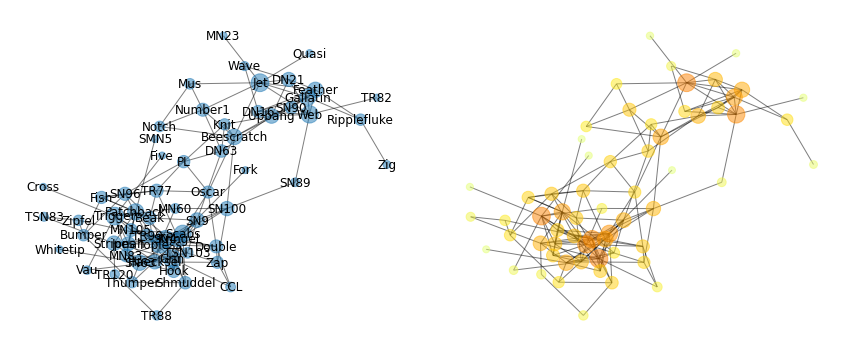

In [15]:

pos=nx.spring_layout(gml_graph,k=3/np.sqrt(N))

node_size = [v * 10000 for v in X[-1]]


f1,ax = plt.subplots(1,2,figsize=(12,5))
nx.draw_networkx_edges(gml_graph,         
        pos=pos, 
        ax = ax[0],
        alpha=.5)

nx.draw_networkx_nodes(gml_graph, 
        pos=pos, 
        ax = ax[0],
        node_size=node_size,
        alpha=.5)
        
labels = nx.draw_networkx_labels(gml_graph, pos=pos,ax=ax[0])

f1.patch.set_visible(False)
ax[0].axis('off')

nx.draw(gml_graph,
        pos=pos,
        ax = ax[1],
        node_size=node_size,
        node_color=X[-1],
        alpha=.5,
        cmap='Wistia')

plt.tight_layout()
plt.savefig('Dolphins2.pdf')


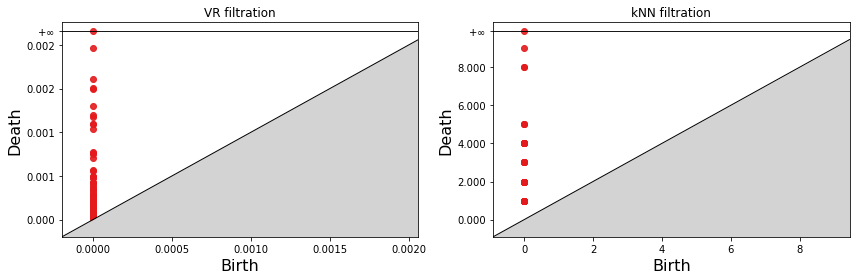

In [16]:
f1,ax = plt.subplots(1,2,figsize=(12,4))

filtration_steps = linspace(0,1,1000)
ids = arange(N)

nodes=rowvect2D(X[-1])
dn=dists(nodes,nodes)

FINAL_diag_VR=dist2PD(dn,2,1)[1]
gd.plot_persistence_diagram(persistence=FINAL_diag_VR,alpha = .9,axes=ax[0]);
title('VR filtration')


FINAL_neighbor_order_matrix = neighbor_ordering(nodes,'max')
FINAL_neighbor_order_matrix_min = neighbor_ordering(nodes,'min')


FINAL_diag_kNN=dist2PD(FINAL_neighbor_order_matrix,1,13)[1]
FINAL_diag_kNN_min=dist2PD(FINAL_neighbor_order_matrix_min,1,13)[1]

gd.plot_persistence_diagram(persistence=FINAL_diag_kNN,alpha = .9,axes=ax[1]);
ax[0].set_title('VR filtration')
ax[1].set_title('kNN filtration')


plt.tight_layout()
plt.savefig('dolphin_PD.pdf')

C:\Users\MINHLE~1\AppData\Local\Temp/ipykernel_3176/3465049202.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


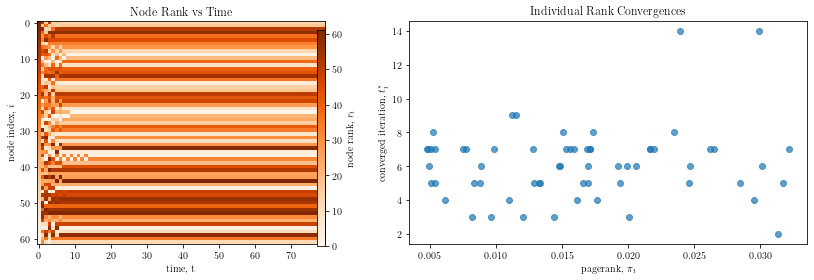

In [17]:
def plot_ranks_vs_time(X,fig,ax):

    ranks = zeros(shape(X))
    for t in range(len(X)):
        ranks[t] = argsort(-X[t])
    plott = ax.imshow(ranks.T,cmap='Oranges');    
    ax.set_title('Node Rank vs Time')
    ax.set_ylabel('node index, $i$')
    ax.set_xlabel('time, t')
    
    cbaxes = fig.add_axes([0.42, 0.13, 0.01, 0.75])
    cb = plt.colorbar(plott, cax = cbaxes,orientation='vertical')
    cbaxes.set_ylabel('node rank, $r_i$')

    return ranks

f1,ax = plt.subplots(1,2,figsize=(12,4))
ranks = plot_ranks_vs_time(X[:,:],fig=f1,ax=ax[0])  

converged_ranks = (1-(abs(ranks - ranks[-1])>0)*1)


time_converged = zeros(N)
for n in range(N):
    time_converged[n] = where(converged_ranks[:,n]==0)[0][-1]    
ax[1].scatter(X[-1],time_converged+1,alpha=.7)    
ax[1].set_xlabel('pagerank, $\pi_i$')
ax[1].set_ylabel('converged iteration, $t^*_i$')
ax[1].set_title('Individual Rank Convergences')


plt.tight_layout()
plt.savefig('dolphins_agh.pdf')

In [18]:
ranks

array([[61., 60., 59., ...,  2.,  1.,  0.],
       [51., 17., 57., ..., 12., 22., 31.],
       [14., 37., 13., ..., 58., 35., 12.],
       ...,
       [14., 17., 51., ..., 58., 35., 12.],
       [14., 17., 51., ..., 58., 35., 12.],
       [14., 17., 51., ..., 58., 35., 12.]])

In [19]:
bottle_distances_VR = zeros(T)
bottle_distances_kNN = zeros(T)
bottle_distances_kNN_min = zeros(T)
matrix_norm = zeros(T)
for t in range(T):
    nodes=rowvect2D(X[t])

    # VR filtration comparisons
    dn=dists(nodes,nodes)    
    diag_VR=dist2PD(dn,2,1)[1]
    bottle_distances_VR[t] = bottleneck(diag_VR,FINAL_diag_VR)[0]

    # kNN filtration comparisons    
    neighbor_order_matrix = neighbor_ordering(nodes,'max')
    diag_kNN=dist2PD(neighbor_order_matrix,1,13)[1]
    bottle_distances_kNN[t] = bottleneck(diag_kNN,FINAL_diag_kNN)[0]
    bottle_distances_kNN[t] = bottle_distances_kNN[t] * (bottle_distances_kNN[t]>10**(-16))
    
    #matrix_norm[t] = np.linalg.norm(FINAL_neighbor_order_matrix - neighbor_order_matrix,ord='fro')
    matrix_norm[t] =  np.sum(np.triu(FINAL_neighbor_order_matrix) != np.triu(neighbor_order_matrix))*1/N/(N-1)*2
    
    neighbor_order_matrix_min = neighbor_ordering(nodes,'min')
    diag_kNN_min=dist2PD(neighbor_order_matrix_min,1,13)[1]
    bottle_distances_kNN_min[t] = bottleneck(diag_kNN_min,FINAL_diag_kNN_min)[0]
    bottle_distances_kNN_min[t] = bottle_distances_kNN_min[t] * (bottle_distances_kNN_min[t]>10**(-16))
    #print (diag_VR)

In [20]:
diff_X = array([ norm(X[t] - X[-1]) for t in range(len(X))] )
diff_ranks = np.sum(abs(ranks - ranks[-1])>0,1)
#diff_X
iters_to_convergence = where(diff_ranks>0)[0][-1]
iters_to_convergence

13

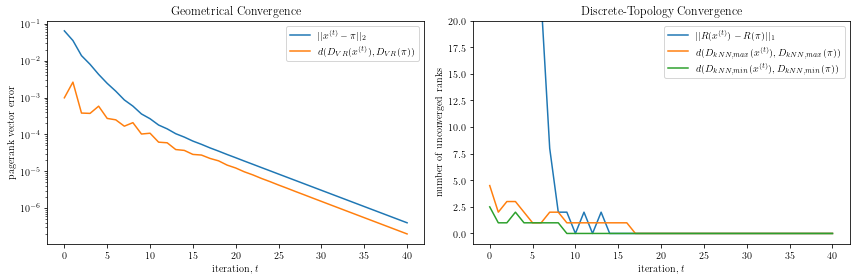

In [21]:
f1,ax = plt.subplots(1,2,figsize=(12,4))
# ax[0].plot(diff_ranks[:-1])
# ax[0].set_title('Number of Unconverged PageRanks')
# ax[1].semilogy(diff_X[:-1])
# ax[1].set_title('PageRank Vector Convergence')



its = arange(41)

ax[0].semilogy(diff_X[its])
ax[0].semilogy((bottle_distances_VR[its]))
ax[0].set_title('Geometrical Convergence')
ax[0].legend(['$||x^{(t)} -\pi||_2$','$d(D_{VR}(x^{(t)}),D_{VR}(\pi))$'])

ax[1].plot(diff_ranks[its])
ax[1].plot((bottle_distances_kNN[its]))
ax[1].plot((bottle_distances_kNN_min[its]))
ax[1].set_title('Discrete-Topology Convergence')
ax[1].legend(['$||R(x^{(t)}) -R(\pi)||_1$','$d(D_{kNN,max}(x^{(t)}),D_{kNN,max}(\pi))$','$d(D_{kNN,min}(x^{(t)}),D_{kNN,min}(\pi))$'])
ax[1].set_ylim([-1,20])


ax[0].set_xlabel('iteration, $t$')
ax[1].set_xlabel('iteration, $t$')

ax[0].set_ylabel('pagerank vector error')
ax[1].set_ylabel('number of unconverged ranks')



#ax[1].plot((matrix_norm[:-1]))
#ax[3].plot(diff_ranks[:-1])
#ax[3].set_title('Number of Different NNOs')
plt.tight_layout()
plt.savefig('Dolphins_convergence.pdf')


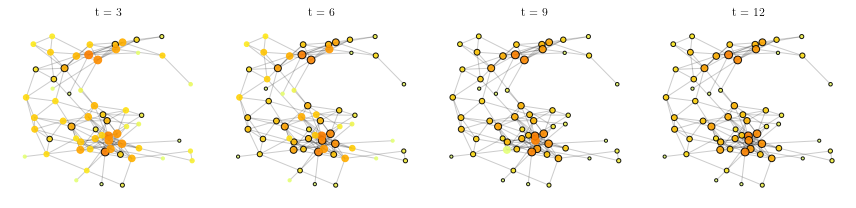

In [22]:
#import operator

#pr4=nx.pagerank(gml_graph,alpha=0.85)
#sorted_pr4=sorted(pr4.items(),key=operator.itemgetter(1))
#dict_pr4=dict(pr4)

pos=nx.spring_layout(gml_graph,k=3/np.sqrt(N))

node_size = [v * 2000 for v in X[-1]]

ts = [3,6,9,12]

f1.patch.set_visible(False)




converged_ranks = (1-(abs(ranks - ranks[-1])>0)*1)



f1,ax = plt.subplots(1,len(ts),figsize=(12,3))
for i,t in enumerate(ts):
    nx.draw_networkx_edges(gml_graph,         
                            pos=pos, 
                            ax = ax[i],
                            alpha=.2)

    ids_conv = where(converged_ranks[t])[0]    
    nodelist = [list(gml_graph.nodes)[i] for i in ids_conv]
    
    nx.draw_networkx_nodes(gml_graph, 
                            pos={key: pos[key] for key in nodelist}, 
                            ax = ax[i],
                            nodelist = [list(gml_graph.nodes)[i] for i in ids_conv],
                            node_size=[node_size[i] for i in ids_conv],
                            node_color=X[t,ids_conv],
                            alpha=.9,
                            cmap='Wistia')

    ids_not_conv = where(converged_ranks[t]==0)[0]    
    nodelist = [list(gml_graph.nodes)[i] for i in ids_not_conv]    
    nx.draw_networkx_nodes(gml_graph, 
                            pos={key: pos[key] for key in nodelist}, 
                            ax = ax[i],
                            nodelist = [list(gml_graph.nodes)[i] for i in ids_not_conv],
                            node_size=[node_size[i] for i in ids_not_conv],
                            node_color=X[t,ids_not_conv],
                            alpha=.9,
                            cmap='Wistia')
    
    ax[i].axis('off')
    axdd = plt.gca() # to get the current axis
    ax[i].collections[1].set_edgecolor("#000000") 
    ax[i].set_title('t = '+str(t))


plt.tight_layout()
plt.savefig('Dolphins_iterations.pdf')


U-LOCAL CONVERGENCE IN MODEL

In [23]:
t = -1
k = 5
x = node_largest_neighbor(X,t,k) # the k nodes with smallest pagerank at iteration t
nodes = rowvect2D(X[-1])
rank_matrix(rowvect2D(X[-1]))[np.ix_(x,x)]

array([[0., 1., 3., 5., 6.],
       [1., 0., 3., 4., 6.],
       [4., 3., 0., 1., 2.],
       [4., 3., 2., 0., 1.],
       [4., 3., 2., 1., 0.]])

In [24]:
x

array([37, 57, 51, 17, 14], dtype=int64)

In [25]:
p = len(x)
nodesl = zeros([p,2])
for i in range(len(x)):
    nodesl[i] = nodes[x[i]]

In [26]:
dnl = dists(nodesl,nodesl)

In [27]:
neighbor_ordering(nodesl,'max')

array([[0., 1., 4., 4., 4.],
       [1., 0., 3., 3., 4.],
       [4., 3., 0., 2., 2.],
       [4., 3., 2., 0., 1.],
       [4., 4., 2., 1., 0.]])

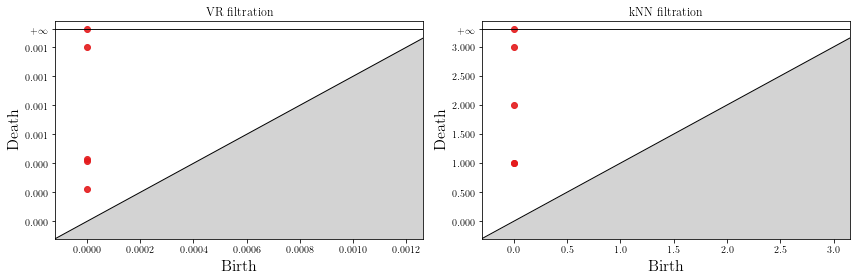

In [28]:
f1,ax = plt.subplots(1,2,figsize=(12,4))

filtration_steps = linspace(0,1,1000)
ids = arange(N)

#nodes=rowvect2D(X[-1])
#dn=dists(nodes,nodes)

FINAL_diag_VRl=dist2PD(dnl,2,1)[1]
gd.plot_persistence_diagram(persistence=FINAL_diag_VRl,alpha = .9,axes=ax[0]);
title('VR filtration')


FINAL_neighbor_order_matrix = neighbor_ordering(nodesl,'max')
FINAL_neighbor_order_matrix_min = neighbor_ordering(nodesl,'min')


FINAL_diag_kNN=dist2PD(FINAL_neighbor_order_matrix,1,13)[1]
FINAL_diag_kNN_min=dist2PD(FINAL_neighbor_order_matrix_min,1,13)[1]

gd.plot_persistence_diagram(persistence=FINAL_diag_kNN,alpha = .9,axes=ax[1]);
ax[0].set_title('VR filtration')
ax[1].set_title('kNN filtration')


plt.tight_layout()


In [29]:
p = len(x)
nodesl = zeros([p,2])

bottle_distances_VR = zeros(T)
bottle_distances_kNN = zeros(T)
bottle_distances_kNN_min = zeros(T)
matrix_norm = zeros(T)
for t in range(T):
    nodes=rowvect2D(X[t])
    for i in range(len(x)):
        nodesl[i] = nodes[x[i]]
        dnl = dists(nodesl,nodesl)
        diag_VR=dist2PD(dnl,2,1)[1]
        bottle_distances_VR[t] = bottleneck(diag_VR,FINAL_diag_VR)[0]

    # kNN filtration comparisons    
        neighbor_order_matrix = neighbor_ordering(nodesl,'max')
        diag_kNN=dist2PD(neighbor_order_matrix,1,13)[1]
        bottle_distances_kNN[t] = bottleneck(diag_kNN,FINAL_diag_kNN)[0]
        bottle_distances_kNN[t] = bottle_distances_kNN[t] * (bottle_distances_kNN[t]>10**(-16))
    
    #matrix_norm[t] = np.linalg.norm(FINAL_neighbor_order_matrix - neighbor_order_matrix,ord='fro')
        matrix_norm[t] =  np.sum(np.triu(FINAL_neighbor_order_matrix) != np.triu(neighbor_order_matrix))*1/N/(N-1)*2
    
        neighbor_order_matrix_min = neighbor_ordering(nodesl,'min')
        diag_kNN_min=dist2PD(neighbor_order_matrix_min,1,13)[1]
        bottle_distances_kNN_min[t] = bottleneck(diag_kNN_min,FINAL_diag_kNN_min)[0]
        bottle_distances_kNN_min[t] = bottle_distances_kNN_min[t] * (bottle_distances_kNN_min[t]>10**(-16))


In [30]:
M = zeros((T))
p = len(x)
N = zeros(p)
for t in range(T):
    for i in range(p):
        N[i] = np.array(X[t][x[i]]-X[-1][x[i]])
    M[t] = norm(N[i])

In [31]:
diff_X = array([ norm(X[t] - X[-1]) for t in range(len(X))] )
diff_ranks = np.sum(abs(ranks - ranks[-1])>0,1)
iters_to_convergence = where(diff_ranks>0)[0][-1]
iters_to_convergence

13

In [32]:
ranksl = ranks [np.ix_(x,x)]
ranksl

array([[ 2.,  4., 39.,  6., 43.],
       [ 2.,  4., 39.,  6., 43.],
       [ 2.,  4., 39.,  6., 43.],
       [ 2.,  4., 39.,  6., 43.],
       [ 2.,  4., 39.,  6., 43.]])

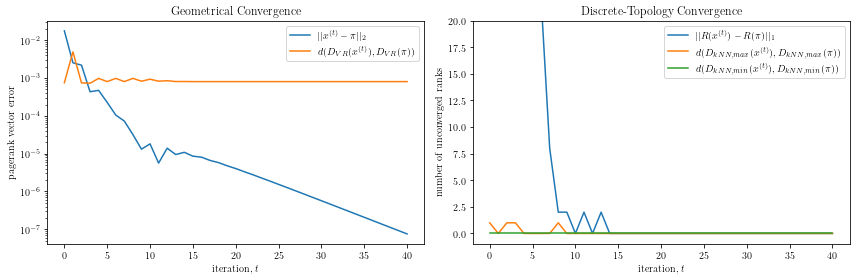

In [33]:
f1,ax = plt.subplots(1,2,figsize=(12,4))
its = arange(41)

ax[0].semilogy(M[its])
ax[0].semilogy((bottle_distances_VR[its]))
ax[0].set_title('Geometrical Convergence')
ax[0].legend(['$||x^{(t)} -\pi||_2$','$d(D_{VR}(x^{(t)}),D_{VR}(\pi))$'])

ax[1].plot(diff_ranks[its])
ax[1].plot((bottle_distances_kNN[its]))
ax[1].plot((bottle_distances_kNN_min[its]))
ax[1].set_title('Discrete-Topology Convergence')
ax[1].legend(['$||R(x^{(t)}) -R(\pi)||_1$','$d(D_{kNN,max}(x^{(t)}),D_{kNN,max}(\pi))$','$d(D_{kNN,min}(x^{(t)}),D_{kNN,min}(\pi))$'])
ax[1].set_ylim([-1,20])


ax[0].set_xlabel('iteration, $t$')
ax[1].set_xlabel('iteration, $t$')

ax[0].set_ylabel('pagerank vector error')
ax[1].set_ylabel('number of unconverged ranks')



plt.tight_layout()
